## Fundamentos de Data Science
### Analizando la Rotación de Clientes en Telecomunicaciones

#### Requisitos:

Tu tarea es limpiar y explorar un dataset para los ejecutivos de una empresa de telecomunicaciones que describe tendencias en la rotación de sus clientes.


In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time as tm
import pprint
import seaborn as sns

#Importamos el archivo de nuestra carpeta

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', sep=',')
print('Dataset Telcom Churn:')
#Visualizamos las primeras 5 filas
df.head(5)

Dataset Telcom Churn:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [168]:
# Visualizamos las ultimas 5 filas
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [169]:
# Verificamos los tipos de datos, columnas y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 



1) #### Limpieza de datos con Python:
- Identificar y solucionar cualquier valor duplicado.
- Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
- Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).
- Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.
- Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).


In [170]:
#Identidicamos los valores duplicados
print('Suma de valores duplicados',df.duplicated().sum())

Suma de valores duplicados 0


In [171]:
df.value_counts() #contamos valores unicos

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
9995-HOTOH  Male    0              Yes      Yes         63      No            No phone service  DSL              Yes                  Yes                  Yes                  No                   Yes                  Yes                  Two year        No                Electronic check           59.00           3707.6        No       1
0002-ORFBO  Female  0              Yes      Yes         9       Yes           No                DSL              No                   Yes                  No                   Yes                  Yes                  No                   One year        Yes               Mailed check               65.60           593.3  

In [172]:
# Visualizamos las columnas
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Corregimos los tipos de datos.

In [173]:
#Eliminamos primero los espacios en blanco 
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
# Convertimos el tipo de dato de 'TotalCharges' a float
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [174]:

# Lista de columnas a convertir de object a category
columns_to_convert = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Convertir las columnas a tipo 'category' para mejor manejo de los datos y optimizacion del almacenamiento
for column in columns_to_convert:
    df[column] = df[column].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

### Buscamos anomalias en valores categoricos.

In [175]:
# Visualizamos los valores unicos buscando algun error a simple vista
print('Valores en gender: ', df['gender'].unique())


Valores en gender:  ['Female', 'Male']
Categories (2, object): ['Female', 'Male']


In [176]:
# Visualizamos los valores unicos buscando algun error a simple vista
print('Valores en Partner: ',df['Partner'].unique())

Valores en Partner:  ['Yes', 'No']
Categories (2, object): ['No', 'Yes']


In [177]:
# Visualizamos los valores unicos buscando algun error a simple vista
print('Valores en Dependents: ',df['Dependents'].unique())


Valores en Dependents:  ['No', 'Yes']
Categories (2, object): ['No', 'Yes']


In [178]:
# Visualizamos los valores unicos buscando algun error a simple vista
print('Valores en PhoneService: ',df['PhoneService'].unique())

Valores en PhoneService:  ['No', 'Yes']
Categories (2, object): ['No', 'Yes']


In [179]:
# Visualizamos los valores unicos buscando algun error a simple vista
print('Valores en PhoneService: ',df['PhoneService'].unique())

Valores en PhoneService:  ['No', 'Yes']
Categories (2, object): ['No', 'Yes']


In [180]:
# Visualizamos los valores unicos buscando algun error a simple vista
print('Valores en MultipleLines: ',df['MultipleLines'].unique())

Valores en MultipleLines:  ['No phone service', 'No', 'Yes']
Categories (3, object): ['No', 'No phone service', 'Yes']


In [181]:
# Visualizamos los valores unicos buscando algun error a simple vista
print('Valores en InternetService: ',df['InternetService'].unique())

Valores en InternetService:  ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']


In [182]:
# Visualizamos los valores unicos buscando algun error a simple vista
print('Valores en OnlineSecurity: ',df['OnlineSecurity'].unique())

Valores en OnlineSecurity:  ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']


In [183]:
# Visualizamos los valores unicos buscando algun error a simple vista
print('Valores en OnlineBackup: ',df['OnlineBackup'].unique())

Valores en OnlineBackup:  ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']


In [184]:
# Visualizamos los valores unicos buscando algun error a simple vista
print('Valores en DeviceProtection: ',df['DeviceProtection'].unique())

Valores en DeviceProtection:  ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']


In [185]:
# Visualizamos los valores unicos buscando algun error a simple vista
print('Valores en TechSupport: ',df['TechSupport'].unique())

Valores en TechSupport:  ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']


In [186]:
# Visualizamos los valores unicos buscando algun error a simple vista
print('Valores en StreamingTV: ',df['StreamingTV'].unique())

Valores en StreamingTV:  ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']


In [187]:
# Visualizamos los valores unicos buscando algun error a simple vista
print('Valores en StreamingMovies: ',df['StreamingMovies'].unique())

Valores en StreamingMovies:  ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']


In [188]:
# Visualizamos los valores unicos buscando algun error a simple vista
print('Valores en Contract: ',df['Contract'].unique())

Valores en Contract:  ['Month-to-month', 'One year', 'Two year']
Categories (3, object): ['Month-to-month', 'One year', 'Two year']


In [189]:
# Visualizamos los valores unicos buscando algun error a simple vista
print('Valores en PaperlessBilling: ',df['PaperlessBilling'].unique())

Valores en PaperlessBilling:  ['Yes', 'No']
Categories (2, object): ['No', 'Yes']


In [190]:
# Visualizamos los valores unicos buscando algun error a simple vista
print('Valores en PaymentMethod: ',df['PaymentMethod'].unique())

Valores en PaymentMethod:  ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Categories (4, object): ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']


In [191]:
# Visualizamos los valores unicos buscando algun error a simple vista
print('Valores en Churn: ',df['Churn'].unique())

Valores en Churn:  ['No', 'Yes']
Categories (2, object): ['No', 'Yes']


### Gestionamos valores nulos

In [192]:
# Verificamos los valores nulos
# Codigo extraido de la clase de valores nulos del profesor Iair Linker
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
TotalCharges,7032,11,0.16
gender,7043,0,0.00
SeniorCitizen,7043,0,0.00
Partner,7043,0,0.00
customerID,7043,0,0.00
Dependents,7043,0,0.00
tenure,7043,0,0.00
MultipleLines,7043,0,0.00
PhoneService,7043,0,0.00
OnlineSecurity,7043,0,0.00


#### Busqueda de la relacion de los datos y busqueda la relacion de los nulos
En esta etapa me puse a buscar por que estaban nulos los valores buscando una relacion directa entre los servicios para poder promediar.
Pero yendo a la pagina de kaggle donde se encuentra el dataset, fui al link de donde se encuentra la metadata de los titulos y leyendo vi que 'tenure' eran los dias con la compania.
entonces verifique ese dato que antes lo ignoraba.

In [193]:
# Busqueda de relacion de dias con la compania y los valores nulos
print('maximo meses en la compania: ',df['tenure'].max())
print('minimo meses en la compania: ',df['tenure'].min())

maximo meses en la compania:  72
minimo meses en la compania:  0


In [194]:
# 11 dias de valores en cero con la compania, que reflejan que no se concreto estos contratos
sin_meses = df[df['tenure'] == 0]
sin_meses

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [195]:
# Eliminacion de valores nulos porque son contratos que no se concretaron
df.dropna(inplace=True)
df.shape

(7032, 21)

In [196]:
#revisamos valores estadisticos para una mejor compresion de los datos
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [197]:
#ordenamos por el valor de 'tenure' porque es el dato con mayor influencia sobre el dato
df.sort_values(by='tenure')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3942,6959-UWKHF,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,42.90,42.90,Yes
3943,8720-RQSBJ,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.00,44.00,No
3843,0812-WUPTB,Male,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Mailed check,70.85,70.85,Yes
6969,4745-LSPLO,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.50,20.50,Yes
5585,4667-OHGKG,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.30,19.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
28,5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No
5419,7173-TETGO,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Two year,No,Bank transfer (automatic),78.50,5602.25,No


<Axes: >

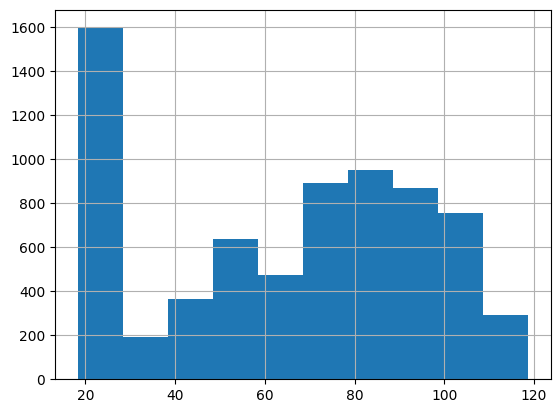

In [210]:
df['MonthlyCharges'].hist()


In [199]:
df['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

#### Con este grafico vemos que hay una mayor cantidad de personas entre el minimo y el primer cuartil.

<Axes: >

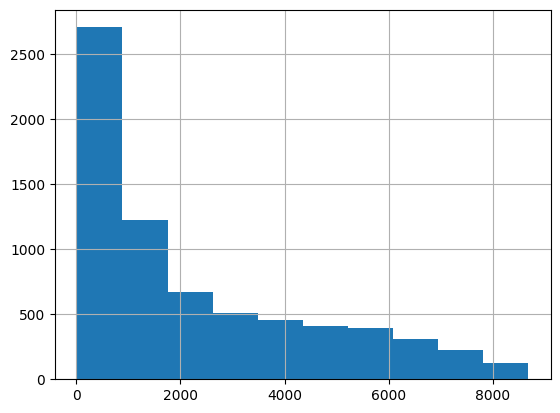

In [200]:
df['TotalCharges'].hist()
# En este grafico podemos ver que la mayor parte de los clientes efectivamente estan en el rango de 18 dolares que es nuestro a 400 dolares que es nuestro primer cuartil 

### En este grafico podemos ver que la mayor parte de los clientes estan en el rango de 18 dolares que es nuestro minimo a 1397 dolares que es nuestro segundo cuartil 50% (Q2)

In [201]:
print('Verificamos valores estadisticos para la confirmacion de la compresion de los datos')
df['TotalCharges'].describe()

Verificamos valores estadisticos para la confirmacion de la compresion de los datos


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


2) ### Exploración de datos con Python:
- Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
- Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.


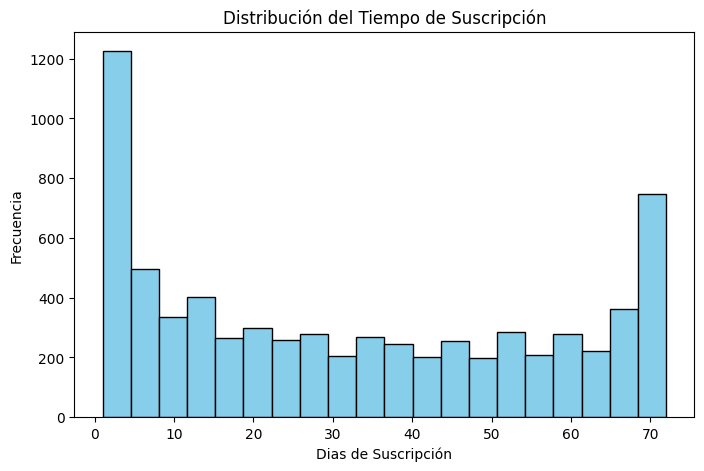

In [211]:
# Histograma para analizar la distribución de la cantidad de dias de suscripcion
plt.figure(figsize=(8, 5))
plt.hist(df['tenure'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución del Tiempo de Suscripción')
plt.xlabel('Dias de Suscripción')
plt.ylabel('Frecuencia')
plt.show()
# Interpretación: Encontramos una concentración en los extremos de la distribución, siendo las personas con menor cantidad de dias de suscripcion la de mayor relevancia


In [203]:
print('Verificamos valores estadisticos para la confirmacion de la compresion de los datos')
df['tenure'].describe()

Verificamos valores estadisticos para la confirmacion de la compresion de los datos


count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

### Interpretación: Encontramos una concentración en los extremos de la distribución, siendo las personas con menor cantidad de dias de suscripcion la de mayor relevancia

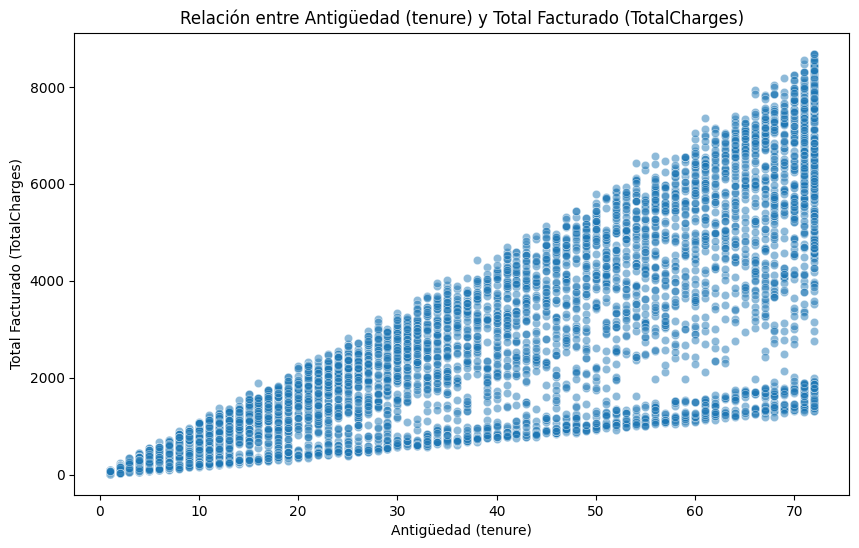

In [204]:
# Aseguramos que TotalCharges sea numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# SccaterPlot: Visualizamos la relación entre tenure y TotalCharges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,x='tenure', y='TotalCharges',  alpha=0.5)
plt.title('Relación entre Antigüedad (tenure) y Total Facturado (TotalCharges)')
plt.xlabel('Antigüedad (tenure)')
plt.ylabel('Total Facturado (TotalCharges)')
plt.show()

### Interpretacion: Esta visualización muestra cómo se acumula el total facturado en función del tiempo que el cliente ha estado en la compañía (antigüedad). Tendencia esperada: cuanto mayor es la antigüedad, mayor es el total facturado, reflejando la acumulación de cargos con el tiempo.

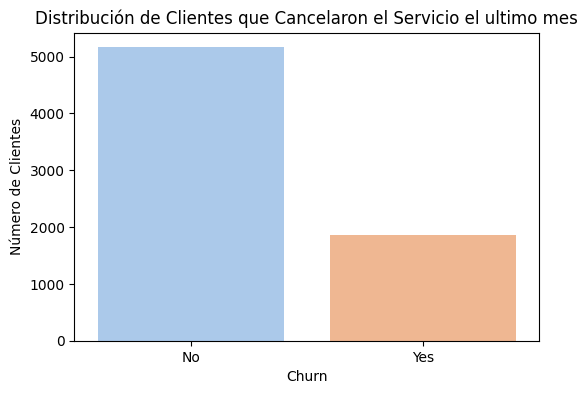

In [221]:
# Gráfico de barras de churn para analizar la proporción de clientes que cancelaron el servicio
plt.figure(figsize=(6, 4))
sns.countplot(data=df,x='Churn',  palette='pastel', hue='Churn')
plt.title('Distribución de Clientes que Cancelaron el Servicio el ultimo mes')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()
# Interpretación: La gráfica muestra el número de clientes que cancelaron el servicio frente a los que no lo hicieron.

### Interpretación: La gráfica muestra el número de clientes que cancelaron el servicio frente a los que no lo hicieron, indicando retención de clientes.
### Siendo No los clientes que no dejaron la compania, y Yes los que si dejaron la compania durante el ultimos mes.

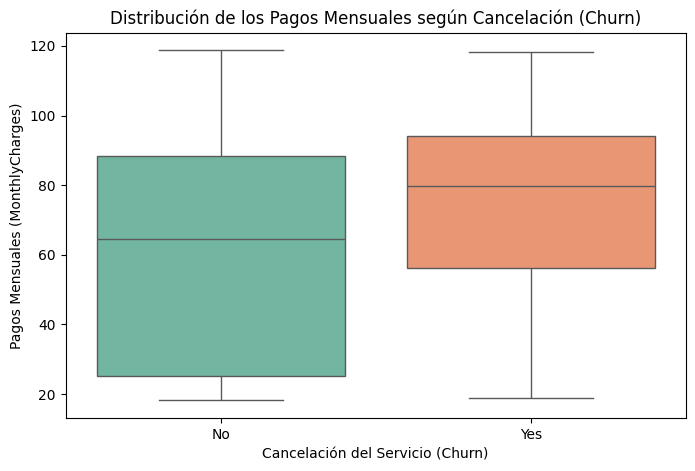

In [206]:
# Boxplot del pago mensual frente a la cancelación del servicio
plt.figure(figsize=(8, 5))
# Gráfico de caja (boxplot) para observar la relación entre MonthlyCharges y Churn
sns.boxplot(data=df,x='Churn', y='MonthlyCharges',  palette='Set2', hue='Churn')
plt.title('Distribución de los Pagos Mensuales según Cancelación (Churn)')
plt.xlabel('Cancelación del Servicio (Churn)')
plt.ylabel('Pagos Mensuales (MonthlyCharges)')
plt.show()
# Interpretación: Los clientes que cancelaron el servicio tienden a tener Pagos mensuales más altos en promedio,indica una correlación entre pago mensual y cancelación.


### Interpretación: Los clientes que cancelaron el servicio tienden a tener Pagos mensuales más altos en promedio, indica una correlación entre pago mensual y cancelación.

Clientes que cancelaron el servicio (Churn = 1): Observamos una mayor mediana y un rango intercuartílico más alto en MonthlyCharges, nos indica que los clientes con pagos mensuales altos tienen mayor probabilidad de cancelar.

Clientes que mantuvieron el servicio (Churn = 0): La mediana es más baja en comparación, refleja una menor tendencia de cancelación entre los clientes con pagos mensuales bajos.

### Otros datos interesantes a tener en cuenta

#### Servicio de internet.

<Figure size 1000x600 with 0 Axes>

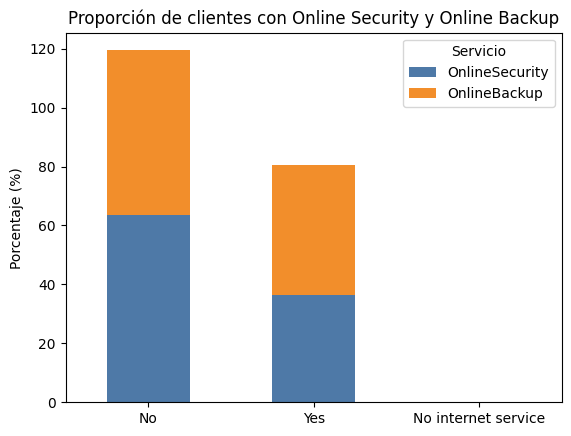

In [207]:
# Filtrar solo los clientes que tienen servicio de internet
internet_users = df[df['InternetService'] != 'No']

# porcentajes de clientes con Online Security y Online Backup
services = internet_users[['OnlineSecurity', 'OnlineBackup']].apply(lambda x: x.value_counts(normalize=True) * 100) # Convertir a porcentajes con ayuda de chatgpt, me dio varios errores antes
services = services.fillna(0)  # Reemplazar NaN con 0 para servicios no usados

# Visualizar
plt.figure(figsize=(10, 6))
services.plot(kind='bar', stacked=True, color=['#4e79a7', '#f28e2b', '#e15759'])
plt.title('Proporción de clientes con Online Security y Online Backup')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)
plt.legend(title='Servicio')
plt.show()


La mayoría de los clientes que tienen el servicio de Internet no utilizan OnlineSecurity u OnlineBackup, ya que la proporción de No es significativamente mayor que la de Yes en ambos servicios.

Esto sugiere que, entre los usuarios de Internet, pocos optan por tener ambos servicios adicionales (OnlineSecurity y OnlineBackup).

Este análisis puede ser útil para entender el comportamiento de los usuarios con relacion a los servicios adicionales y puede ayudar a identificar áreas para mejorar la adopción de estos servicios.

- Escrito por mi y optimizado por Chatgpt.

#### Servicio de telefono.

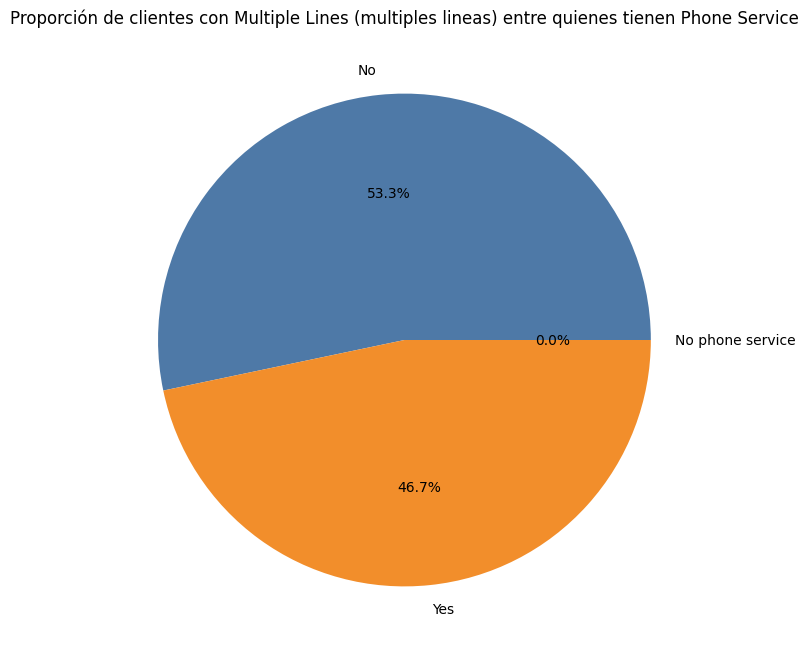

In [209]:
# Filtrar solo los clientes que tienen servicio de PhoneService
phone_users = df[df['PhoneService'] == 'Yes']

# Calcular porcentaje de clientes con y sin MultipleLines entre los que tienen PhoneService
multiple_lines_counts = phone_users['MultipleLines'].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(multiple_lines_counts, labels=multiple_lines_counts.index, autopct='%1.1f%%', colors=['#4e79a7', '#f28e2b'])
plt.title('Proporción de clientes con Multiple Lines (multiples lineas) entre quienes tienen Phone Service')
plt.show()

### Esta visualizacion nos muestra que la mayor parte de los usuarios que cuentan con servicio de telefono no tienen multiples servicios.


#### Entrega:

- Un archivo .ipynb claramente comentado con todo el código utilizado para la limpieza y exploración de datos. Para cumplir con los requisitos anteriores, este archivo tendrá un mínimo de 4 visualizaciones.
- Subir un repositorio a una plataforma de control de versiones (por ejemplo, GitHub) con un TAG incluido para verificar la fecha de entrega. El repositorio debe contener el archivo .ipynb.
- NOTA: Debes enviar un archivo y un enlace al repositorio con el TAG correspondiente. Las presentaciones de enlaces sin el archivo o sin el TAG serán consideradas no presentadas.

#### Notas:

- Para evitar que otros estudiantes copien tu trabajo, asegúrate de que el código no esté guardado en un repositorio público.
- Para minimizar la deducción de puntos, asegúrate de cargar los requisitos completos.
- Si tienes problemas para cargar archivos en la aplicación de exámenes, por favor NO desbloquees otro examen. Envía el archivo por correo electrónico a tu instructor.
- Puedes usar cualquier recurso que tengas disponible (notas de clase, Google, Stackoverflow, etc.) – PERO DEBES CITAR CUALQUIER FUENTE UTILIZADA. Puedes citar fuentes en forma de comentario de código o una celda de texto con enlaces a cualquier recurso que hayas utilizado. La falta de citas será considerada plagio y resultará en la falla del examen.
- No puedes recibir ayuda de ninguna otra persona en este código. Esto incluye compañeros de clase, exalumnos, tu instructor, etc. La colaboración con otra persona en este examen será considerada plagio y resultará en la falla del examen y puede resultar en la expulsión del programa.
- Se permite el uso de LLM (Copilot, GPT, etc.), pero solo como guía o para depuración. Se espera que los estudiantes pongan su máximo esfuerzo.